In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#Get the dataset and its information
dataset=pd.read_csv('Bengaluru_House_Data.csv')
dataset.shape

(13320, 9)

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#removing of feacture that doesnot effect to price
dataset=dataset.drop('availability',axis='columns')
dataset.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
dataset.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [7]:
dataset=dataset.drop('society',axis='columns')
dataset.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
#numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
numerical_features

['bath', 'balcony', 'price']

In [9]:
dataset[numerical_features].isnull().sum()

bath        73
balcony    609
price        0
dtype: int64

In [10]:
for feature in numerical_features:
    dataset[feature]=dataset[feature].fillna(dataset[feature].mode()[0])
dataset[numerical_features].isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [11]:
#Categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
categorical_features

['area_type', 'location', 'size', 'total_sqft']

In [12]:
dataset[categorical_features].isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
dtype: int64

In [13]:
for feature in categorical_features:
    dataset[feature]=dataset[feature].fillna(dataset[feature].mode()[0])
dataset[categorical_features].isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
dtype: int64

In [14]:
dataset['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [15]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [16]:
def consider_only_bhk_number(x):
    token=x.split(" ")
    try:
        return float(token[0])
    except:
        return None

In [17]:
df1=dataset.copy()
df1['size']=df1['size'].apply(consider_only_bhk_number)
df1.head(10)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2.0,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4.0,2732,4.0,2.0,204.00
7,Super built-up Area,Rajaji Nagar,4.0,3300,4.0,2.0,600.00
8,Super built-up Area,Marathahalli,3.0,1310,3.0,1.0,63.25
9,Plot Area,Gandhi Bazar,6.0,1020,6.0,2.0,370.00


In [18]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
#convert range to its mean value
def convert_range_to_float(x):
    tokens = x.split(" - ")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
print(convert_range_to_float('3-4'))

None


In [21]:
print(convert_range_to_float('34.46Sq. Meter'))

None


In [22]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_range_to_float)


In [23]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [24]:
df1.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [25]:
#remove null values. this null values are for total_sqft like 34.46Sq. Meter, for which convert_range_to_float func 
#returns Null. replace this null values with mean
df1['total_sqft'] = df1['total_sqft'].fillna(df1['total_sqft'].mean())

In [26]:
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [27]:
#Introduce price per sq ft feature, which is a very important feature
#Price is in lakh, so multiply with 1 lakh and then divide price with total_sqft to get price per sqft
df1['price per sqft'] = (df1['price']*100000)/df1['total_sqft']
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,price per sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [28]:
df2 = df1.copy()
#Check how many unique area_types are there
len(df2['area_type'].unique())

4

In [29]:
#check how many unique location are there
len(df2['location'].unique())

1305

In [30]:
#Remove leading and ending spaces from the location so that no ambiguity is created
df2['location'] = df2['location'].apply(lambda x: x.strip())

In [31]:
temp = df2['location'].value_counts()
temp

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [32]:
len(temp[temp >= 30])

100

In [33]:
location_less_than_30 = temp[temp < 30]
location_less_than_30

Dodda Nekkundi                    29
Kudlu                             29
Kammasandra                       29
BTM 2nd Stage                     29
Horamavu Banaswadi                28
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1194, dtype: int64

In [34]:
locations_considered = temp[temp >= 30]
locations_considered

Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Mahadevpura            31
Doddathoguru           30
Kumaraswami Layout     30
Ananth Nagar           30
Chikkalasandra         30
Name: location, Length: 100, dtype: int64

In [35]:
df2['location'] = df2['location'].apply(lambda x: 'other_loc' if x in location_less_than_30 else x )
df2['location'].value_counts()

other_loc             5379
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Mahadevpura             31
Kumaraswami Layout      30
Doddathoguru            30
Chikkalasandra          30
Ananth Nagar            30
Name: location, Length: 101, dtype: int64

In [36]:
df2[df2['total_sqft']/df2['size'] < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,price per sqft
9,Plot Area,other_loc,6.0,1020.0,6.0,2.0,370.0,36274.509804
45,Plot Area,HSR Layout,8.0,600.0,9.0,2.0,200.0,33333.333333
58,Plot Area,other_loc,6.0,1407.0,4.0,1.0,150.0,10660.980810
68,Plot Area,other_loc,8.0,1350.0,7.0,0.0,85.0,6296.296296
70,Plot Area,other_loc,3.0,500.0,3.0,2.0,100.0,20000.000000


In [37]:
df2.shape

(13320, 8)

In [38]:
df3 = df2[~(df2['total_sqft']/df2['size'] < 300)]
df3.shape

(12572, 8)

In [39]:
df2 = df3
df2.shape

(12572, 8)

In [40]:
#Now consider price per sq. ft. Price per sq. ft can be too low or too high. 1st we need to check the description of 
#this feature price per sq ft
df2['price per sqft'].describe()

count     12572.000000
mean       6312.185150
std        4177.946702
min         267.829813
25%        4209.344773
50%        5294.736984
75%        6927.325006
max      176470.588235
Name: price per sqft, dtype: float64

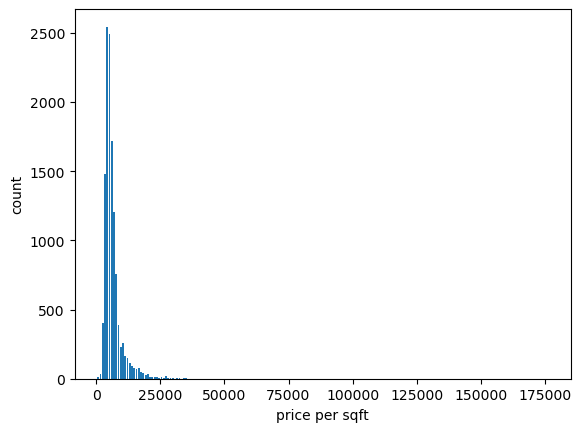

In [41]:
plt.hist(df2['price per sqft'], bins = 200, rwidth = 0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

In [42]:
def remove_pps_outliers(df):
    final_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
         upper_limit = subdf['price per sqft'].mean() + 1*subdf['price per sqft'].std()
         lower_limit = subdf['price per sqft'].mean() - 1*subdf['price per sqft'].std()
         subdf_without_outliers = subdf[(subdf['price per sqft'] >= lower_limit) & (subdf['price per sqft'] <= upper_limit)]
         final_df = pd.concat([final_df , subdf_without_outliers], ignore_index = True)
    return final_df

df3 = remove_pps_outliers(df2)
df3.shape

(10657, 8)

In [43]:
#No. of outlier records removed
df2.shape[0] - df3.shape[0]

1915

In [44]:
#Bathrooms: Its unusual that a 2 BHK house has 5 or 6 bathrooms, so those are outliers
#For bathroom , if no. of bathrooms greater than no. of bed rooms + 2, then it is an outlier and remove them
df3 = df3[df3['bath'] < df3['size'] + 2]
df3.shape

(10561, 8)

In [45]:
#Balcony : Its unusual that a 2 BHK house has 5 or 6 balcony, so those are outliers
#For balcony, if no. of balcony is greater than no of bed rooms + 2, then it is an outlier and remove them
df3 = df3[df3['balcony'] < df3['size'] + 2]
df3.shape

(10561, 8)

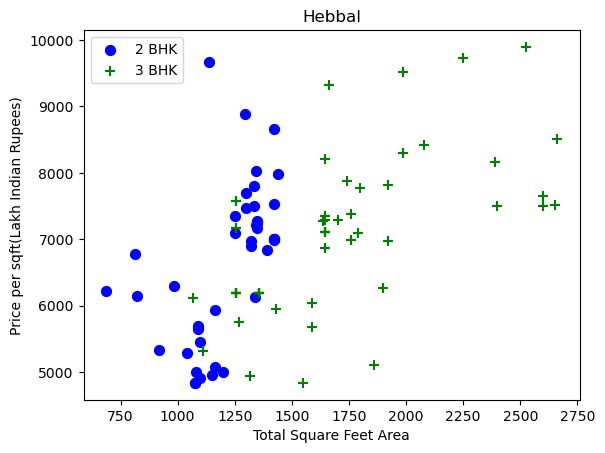

In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location']==location) & (df['size']==2)]
    bhk3 = df[(df['location']==location) & (df['size']==3)]
    plt.scatter(bhk2['total_sqft'],bhk2['price per sqft'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price per sqft'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per sqft(Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Hebbal")

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_dict = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_dict[bhk] = bhk_df['price per sqft'].mean()
             
        for bhk, bhk_df in location_df.groupby('size'):
            prev_bhk_mean = bhk_dict.get(bhk-1)
            if prev_bhk_mean:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft']< prev_bhk_mean].index.values)
    return df.drop(exclude_indices,axis='index')

df4 = remove_bhk_outliers(df3)
df4.shape

(5800, 8)

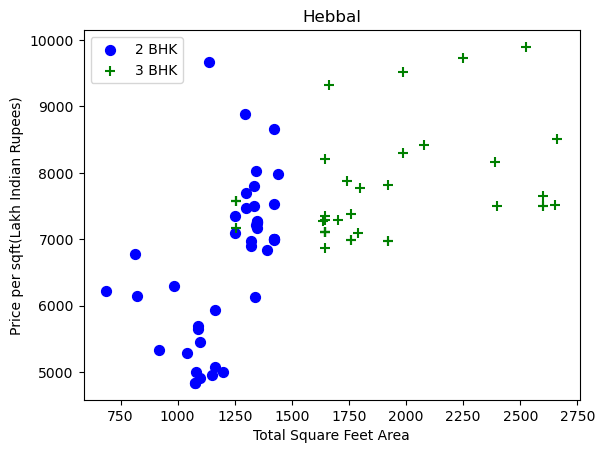

In [48]:
plot_scatter_chart(df4,"Hebbal")

In [49]:
#Now all outliers removed
#Since price per sqft column is only for removing outliers, so we can delete it
df4.drop(['price per sqft'], axis = 'columns', inplace = True)
df4.shape

(5800, 7)

In [50]:
#Convert categorical data into numerical data using one hot encoding

#For area type
dum = pd.get_dummies(df4['area_type'])
dum.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
6,1,0,0,0


In [51]:
df5 = pd.concat([df4,dum], axis = 'columns')

In [52]:
#Drop area_type as dummy columns have already been created
df5.drop(['area_type'] , axis = 1, inplace = True)
df5.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,5th Phase JP Nagar,2.0,1075.0,2.0,2.0,60.0,0,0,0,1
2,5th Phase JP Nagar,2.0,1256.0,2.0,1.0,62.8,1,0,0,0
3,5th Phase JP Nagar,2.0,1207.0,2.0,2.0,63.0,0,0,0,1
4,5th Phase JP Nagar,3.0,1725.0,2.0,2.0,100.0,1,0,0,0
6,5th Phase JP Nagar,3.0,1700.0,2.0,3.0,100.0,1,0,0,0


In [53]:
#Do one hot encoding for location
location_dummy = pd.get_dummies(df5['location'])
df6 = pd.concat([df5,location_dummy], axis = 'columns')
df6.drop(['location'], axis = 1, inplace = True)
df6.shape

(5800, 110)

In [54]:
#Now the model is ready to be trained
X = df6.drop('price' , axis = 'columns')
X.shape

(5800, 109)

In [55]:
y = df6['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8561848351348708

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7986420544795725

In [59]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

0.781706098234469

In [60]:
#Use K-fold cross validation
#Shuffle split will randomize the dataset so that each of the fold will have equal distribution
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr,X,y,cv=cv)

array([0.86961856, 0.87787611, 0.86923611, 0.85743499, 0.86443647])

In [61]:
#Model prediction
X.head()

,size,total_sqft,bath,balcony,Built-up Area,Carpet Area,Plot Area,Super built-up Area,5th Phase JP Nagar,7th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other_loc
0,2.0,1075.0,2.0,2.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1256.0,2.0,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1207.0,2.0,2.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1725.0,2.0,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,1700.0,2.0,3.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
def predict_val(area_type , location, size, total_sqft, bath, balcony):
    area_type_ind = np.where(X.columns == area_type)[0][0]
    
    if location not in locations_considered:
        location = 'other_loc'
    location_ind = np.where(X.columns == location)[0][0]
    
    data = np.zeros(len(X.columns))
    data[0] = size
    data[1] = total_sqft
    data[2] = bath
    data[3] = balcony
    data[area_type_ind] = 1
    data[location_ind] = 1
    
    return lr.predict([data])[0]

In [63]:
predict_val('Built-up  Area','1st Phase JP Nagar',3,2000,4,2)

C:\Users\91900\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


153.82213592529297